# Analyzing NYC's Stormwater Flood Map - Extreme Flood Scenario

Mark Bauer

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import zipfile 
import matplotlib.patches as mpatches
import contextily as ctx

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
print('printing packages and versions:\n')

%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn,matplotlib.pyplot,geopandas

printing packages and versions:

CPython 3.7.1
IPython 7.20.0

numpy 1.19.2
pandas 1.2.1
seaborn 0.11.1
matplotlib.pyplot 3.3.2
geopandas 0.8.1


In [3]:
# # url path from the web
# url = 'https://data.cityofnewyork.us/download/w8eg-8ha6/application%2Fzip'
# print('data url path:', url)

# # assigning file name as 'pfirm_nyc.zip'
# urllib.request.urlretrieve(url, 'stormwater-data-nyc.zip')

# listing files in our directory
print('listing the new downloaded file in our directory:')
%ls

listing the new downloaded file in our directory:
Data_Dictionary_ExtremeFlood.xlsx  figures/
analysis.ipynb                     stormwater-data-nyc/
data-output/                       stormwater-data-nyc.zip


In [4]:
# path = 'stormwater-data-nyc.zip'
# print('name of zip file:', path)

# # opening zip using 'with' keyword in read mode
# with zipfile.ZipFile(path, 'r') as file:
#     # extracing all items in our zipfile
#     # naming our file 'pfirm-nyc'
#     file.extractall('stormwater-data-nyc')

print('listing items after unzipping the file:\n')
%ls stormwater-data-nyc/    

listing items after unzipping the file:

NYC Stormwater Flood Map - Extreme Flood.gdb/


In [5]:
# # url path from the web
# url = 'https://data.cityofnewyork.us/api/views/w8eg-8ha6/files\
# /87be26cc-67b1-4cb0-895d-90a399c79557?download=true&filename=Data_Dictionary_ExtremeFlood.xlsx'
# print('data url path:', url)

# # assigning file name as 'pfirm_nyc.zip'
# urllib.request.urlretrieve(url, 'Data_Dictionary_ExtremeFlood.xlsx')

# listing files in our directory
print('listing the new downloaded file in our directory:')
%ls

listing the new downloaded file in our directory:
Data_Dictionary_ExtremeFlood.xlsx  figures/
analysis.ipynb                     stormwater-data-nyc/
data-output/                       stormwater-data-nyc.zip


In [6]:
path = 'stormwater-data-nyc/NYC Stormwater Flood Map - Extreme Flood.gdb'
gdf = gpd.read_file(path)

gdf.head()

Flooding_Category  Shape_Length    Shape_Area  \
0                  1  3.289858e+07  4.022472e+08   
1                  2  1.685940e+07  3.153255e+08   
2                  3  8.042453e+06  3.455846e+08   

                                            geometry  
0  MULTIPOLYGON Z (((917251.502 120925.181 0.000,...  
1  MULTIPOLYGON Z (((917270.790 120873.747 0.000,...  
2  MULTIPOLYGON Z (((915290.556 120269.389 0.000,...

In [7]:
print('dataframe shape:\n')

rows, columns = gdf.shape
print('number of rows: {:,}.\nnumber of columns: {}.'.format(rows, columns))

dataframe shape:

number of rows: 3.
number of columns: 4.


In [8]:
# summary of the data
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Flooding_Category  3 non-null      int64   
 1   Shape_Length       3 non-null      float64 
 2   Shape_Area         3 non-null      float64 
 3   geometry           3 non-null      geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 224.0 bytes


In [9]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

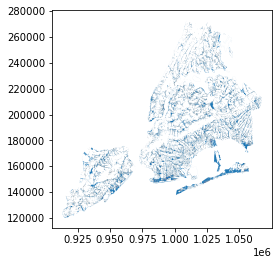

In [10]:
gdf.plot()

In [11]:
gdf['Flooding_Category'].value_counts()

1    1
2    1
3    1
Name: Flooding_Category, dtype: int64

Flooding_Category	
Category of flooding classified by depth of ponding or tidal inundation from sea level rise

>1 - Nuisance Flooding (greater or equal to 4 in. and less than 1 ft.)  
2 - Deep and Contiguous Flooding (1 ft. and greater)  
3 - Future High Tides 2080

In [12]:
gdf['flood_classification'] = gdf['Flooding_Category'].replace(
                                  {1:'Nuisance Flooding', 
                                   2:'Deep and Contiguous Flooding',
                                   3:'Future High Tides 2080'})

gdf.head()

Flooding_Category  Shape_Length    Shape_Area  \
0                  1  3.289858e+07  4.022472e+08   
1                  2  1.685940e+07  3.153255e+08   
2                  3  8.042453e+06  3.455846e+08   

                                            geometry  \
0  MULTIPOLYGON Z (((917251.502 120925.181 0.000,...   
1  MULTIPOLYGON Z (((917270.790 120873.747 0.000,...   
2  MULTIPOLYGON Z (((915290.556 120269.389 0.000,...   

           flood_classification  
0             Nuisance Flooding  
1  Deep and Contiguous Flooding  
2        Future High Tides 2080

In [13]:
gdf['geometry'].geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
dtype: object

In [14]:
gdf = gdf.explode().reset_index(drop=True)

gdf['Shape_Area'] = gdf.area 
gdf['Shape_Length'] = gdf.length 

gdf.head()

Flooding_Category  Shape_Length  Shape_Area flood_classification  \
0                  1     11.396709    1.521997    Nuisance Flooding   
1                  1     38.406428   82.627967    Nuisance Flooding   
2                  1     24.389695   14.028213    Nuisance Flooding   
3                  1    198.696536  820.105280    Nuisance Flooding   
4                  1     50.837975  152.514946    Nuisance Flooding   

                                            geometry  
0  POLYGON Z ((917251.502 120925.181 0.000, 91725...  
1  POLYGON Z ((917309.366 120944.469 0.000, 91729...  
2  POLYGON Z ((917311.973 120963.757 0.000, 91730...  
3  POLYGON Z ((917248.402 120964.877 0.000, 91725...  
4  POLYGON Z ((917168.151 120963.757 0.000, 91715...

In [15]:
print('dataframe shape:\n')

rows, columns = gdf.shape
print('number of rows: {:,}.\nnumber of columns: {}.'.format(rows, columns))

dataframe shape:

number of rows: 171,602.
number of columns: 5.


In [16]:
gdf.groupby(by='flood_classification')['flood_classification'].count()

flood_classification
Deep and Contiguous Flooding     53057
Future High Tides 2080           14690
Nuisance Flooding               103855
Name: flood_classification, dtype: int64

In [17]:
print('summary statistics for all column types:')
gdf.drop(columns='geometry').describe(include='all')

summary statistics for all column types:


Flooding_Category   Shape_Length    Shape_Area flood_classification
count       171602.000000  171602.000000  1.716020e+05               171602
unique                NaN            NaN           NaN                    3
top                   NaN            NaN           NaN    Nuisance Flooding
freq                  NaN            NaN           NaN               103855
mean             1.480396     336.828438  6.707392e+03                  NaN
std              0.648713    2610.329208  1.770588e+05                  NaN
min              1.000000       0.035286  5.118219e-05                  NaN
25%              1.000000      62.021868  1.627130e+02                  NaN
50%              1.000000      95.547533  3.945418e+02                  NaN
75%              2.000000     192.621277  1.362057e+03                  NaN
max              3.000000  723376.852679  5.549524e+07                  NaN

In [18]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171602 entries, 0 to 171601
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Flooding_Category     171602 non-null  int64   
 1   Shape_Length          171602 non-null  float64 
 2   Shape_Area            171602 non-null  float64 
 3   flood_classification  171602 non-null  object  
 4   geometry              171602 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 6.5+ MB


In [19]:
round(gdf['Shape_Area'].describe(), 0)

count      171602.0
mean         6707.0
std        177059.0
min             0.0
25%           163.0
50%           395.0
75%          1362.0
max      55495244.0
Name: Shape_Area, dtype: float64

In [20]:
round(gdf['Shape_Length'].describe(), 0)

count    171602.0
mean        337.0
std        2610.0
min           0.0
25%          62.0
50%          96.0
75%         193.0
max      723377.0
Name: Shape_Length, dtype: float64

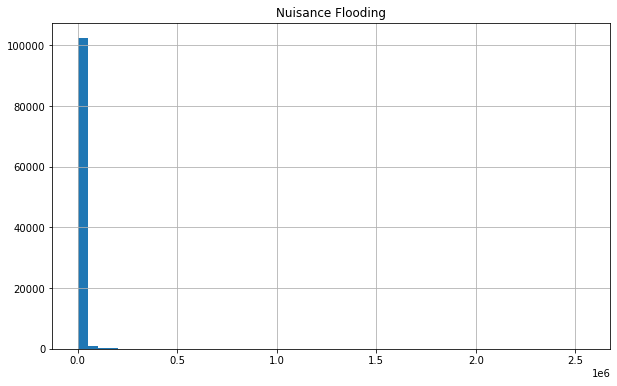

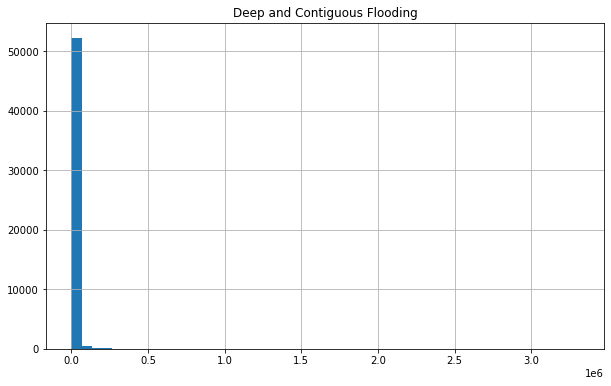

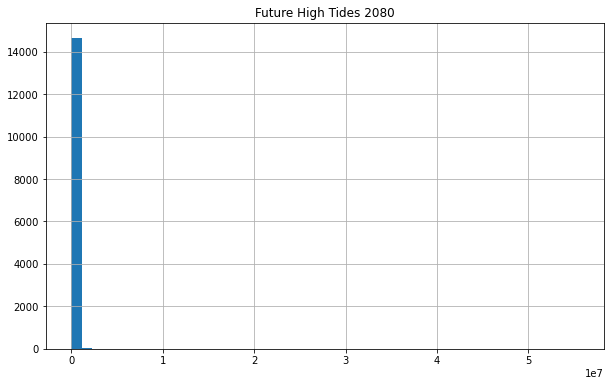

In [21]:
classes = gdf['flood_classification'].unique()

for clas in classes:
    fig, ax = plt.subplots(figsize=(10, 6))
    plot = gdf.loc[gdf['flood_classification'] == clas]
    plot['Shape_Area'].hist(bins=50, ax=ax)
    plt.title(clas)

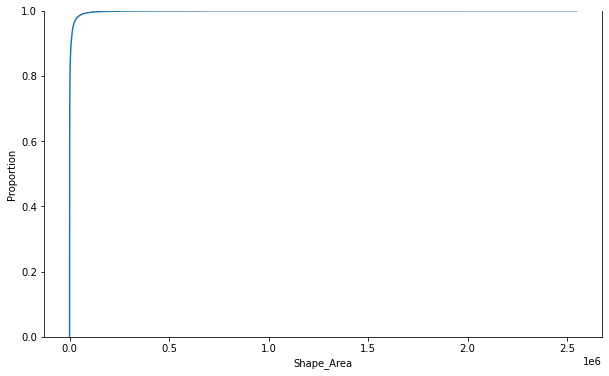

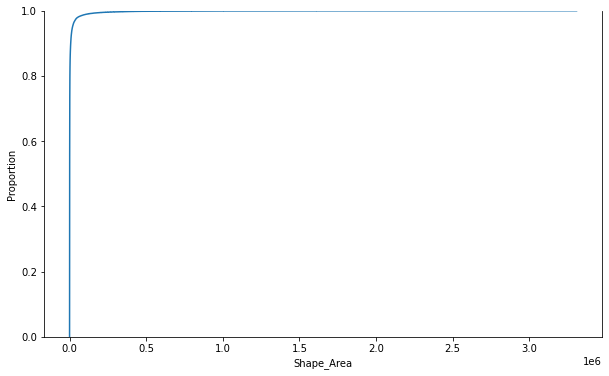

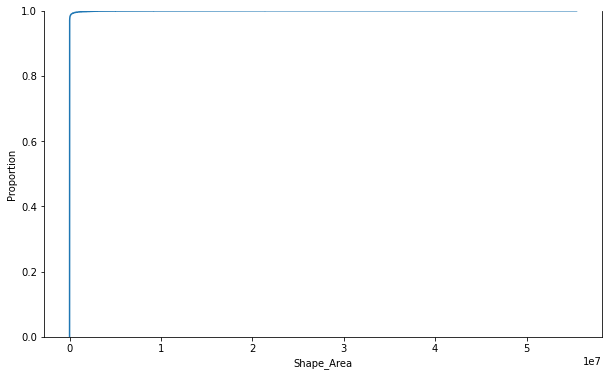

In [22]:
classes = gdf['flood_classification'].unique()

for clas in classes:
    fig, ax = plt.subplots(figsize=(10, 6))
    plot = gdf.loc[gdf['flood_classification'] == clas]
    ax = sns.ecdfplot(data=plot, 
                      x="Shape_Area", 
                      ax=ax)

    ax.spines['top'].set_visible(False)

In [23]:
gdf.head()

Flooding_Category  Shape_Length  Shape_Area flood_classification  \
0                  1     11.396709    1.521997    Nuisance Flooding   
1                  1     38.406428   82.627967    Nuisance Flooding   
2                  1     24.389695   14.028213    Nuisance Flooding   
3                  1    198.696536  820.105280    Nuisance Flooding   
4                  1     50.837975  152.514946    Nuisance Flooding   

                                            geometry  
0  POLYGON Z ((917251.502 120925.181 0.000, 91725...  
1  POLYGON Z ((917309.366 120944.469 0.000, 91729...  
2  POLYGON Z ((917311.973 120963.757 0.000, 91730...  
3  POLYGON Z ((917248.402 120964.877 0.000, 91725...  
4  POLYGON Z ((917168.151 120963.757 0.000, 91715...

In [24]:
flood_class = gdf.groupby(by='flood_classification').count()['geometry']
flood_class = flood_class.reindex(index = ['Nuisance Flooding',
                                           'Deep and Contiguous Flooding',
                                           'Future High Tides 2080'])
flood_class = flood_class.reset_index()
flood_class = flood_class.rename(columns={'geometry':'count'})

flood_class.head()

flood_classification   count
0             Nuisance Flooding  103855
1  Deep and Contiguous Flooding   53057
2        Future High Tides 2080   14690

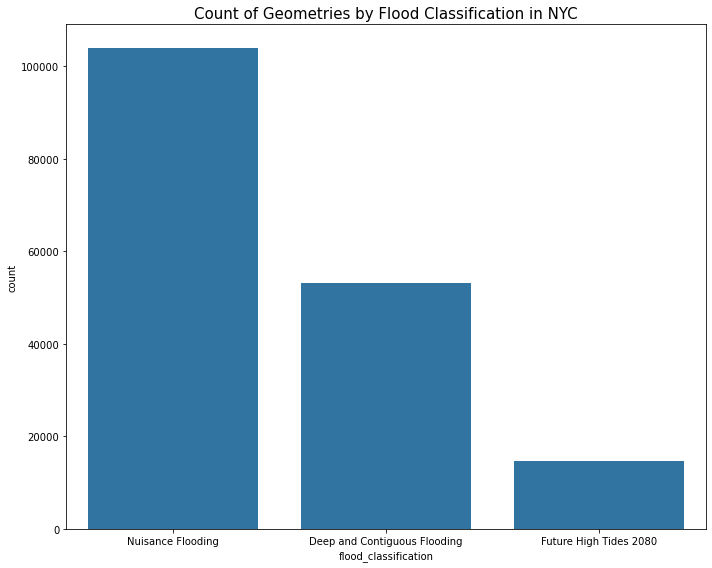

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=flood_class, 
            x='flood_classification', 
            y='count', 
            color='C0',
            ax=ax)

plt.title('Count of Geometries by Flood Classification in NYC', fontsize=15)
plt.tight_layout()

In [26]:
flood_class_sum = gdf.groupby(by='flood_classification')['Shape_Area'].sum()
flood_class_sum = flood_class_sum.reindex(index = ['Nuisance Flooding',
                                           'Deep and Contiguous Flooding',
                                           'Future High Tides 2080'])

flood_class_sum = flood_class_sum.reset_index()

flood_class_sum.head()

flood_classification    Shape_Area
0             Nuisance Flooding  4.328209e+08
1  Deep and Contiguous Flooding  3.672226e+08
2        Future High Tides 2080  3.509584e+08

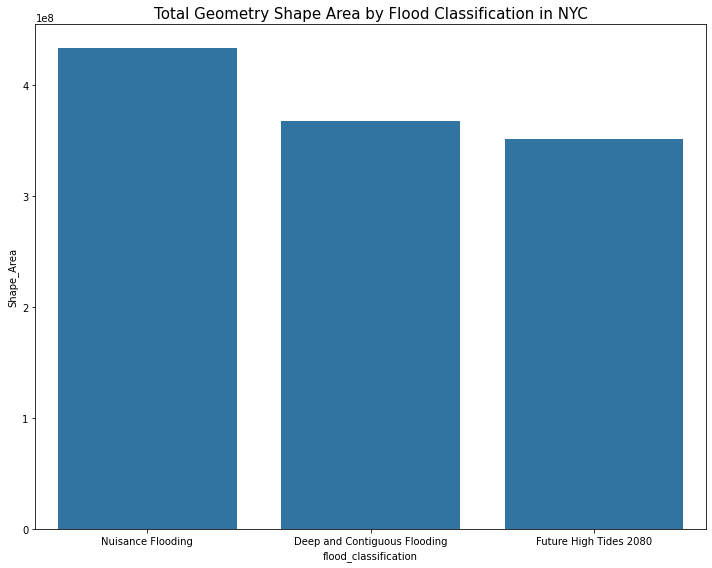

In [27]:
# plot of area by flood zone
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=flood_class_sum, 
            x='flood_classification', 
            y='Shape_Area', 
            color='C0',
            ax=ax)

plt.title('Total Geometry Shape Area by Flood Classification in NYC', fontsize=15)
plt.tight_layout()

In [28]:
flood_class_avg = gdf.groupby(by='flood_classification')['Shape_Area'].mean()
flood_class_avg = flood_class_avg.reindex(index = ['Nuisance Flooding',
                                           'Deep and Contiguous Flooding',
                                           'Future High Tides 2080'])

flood_class_avg = flood_class_avg.reset_index()

flood_class_avg.head()

flood_classification    Shape_Area
0             Nuisance Flooding   4167.550315
1  Deep and Contiguous Flooding   6921.283893
2        Future High Tides 2080  23890.973485

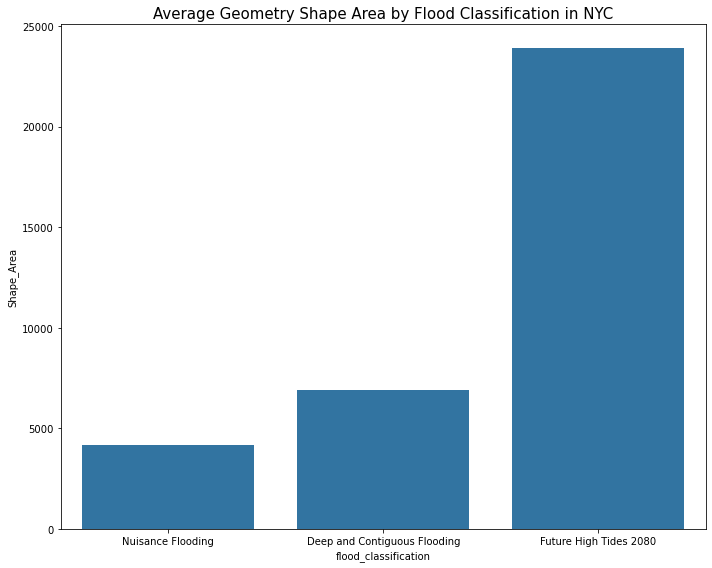

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=flood_class_avg, 
            x='flood_classification', 
            y='Shape_Area', 
            color='C0',
            ax=ax)

plt.title('Average Geometry Shape Area by Flood Classification in NYC', fontsize=15)
plt.tight_layout()

In [30]:
# importing borough boundaries for better aesthetics
path = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile'

borough_gdf = gpd.read_file(path)
borough_gdf.head()

boro_code      boro_name    shape_area     shape_leng  \
0        1.0      Manhattan  6.366208e+08  359993.127161   
1        2.0          Bronx  1.187194e+09  463868.935588   
2        3.0       Brooklyn  1.934174e+09  728195.194837   
3        5.0  Staten Island  1.623631e+09  325924.002252   
4        4.0         Queens  3.040206e+09  900269.281914   

                                            geometry  
0  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
1  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
2  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
3  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

Text(0.5, 1.0, 'nyc boroughs')

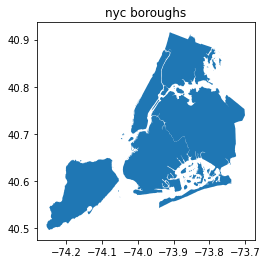

In [31]:
# quick plot of boroughs
borough_gdf.plot()
plt.title('nyc boroughs')

Text(0.5, 1.0, 'nyc boroughs')

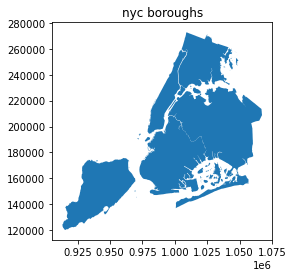

In [32]:
borough_gdf = borough_gdf.to_crs(2263)

borough_gdf.plot()
plt.title('nyc boroughs')

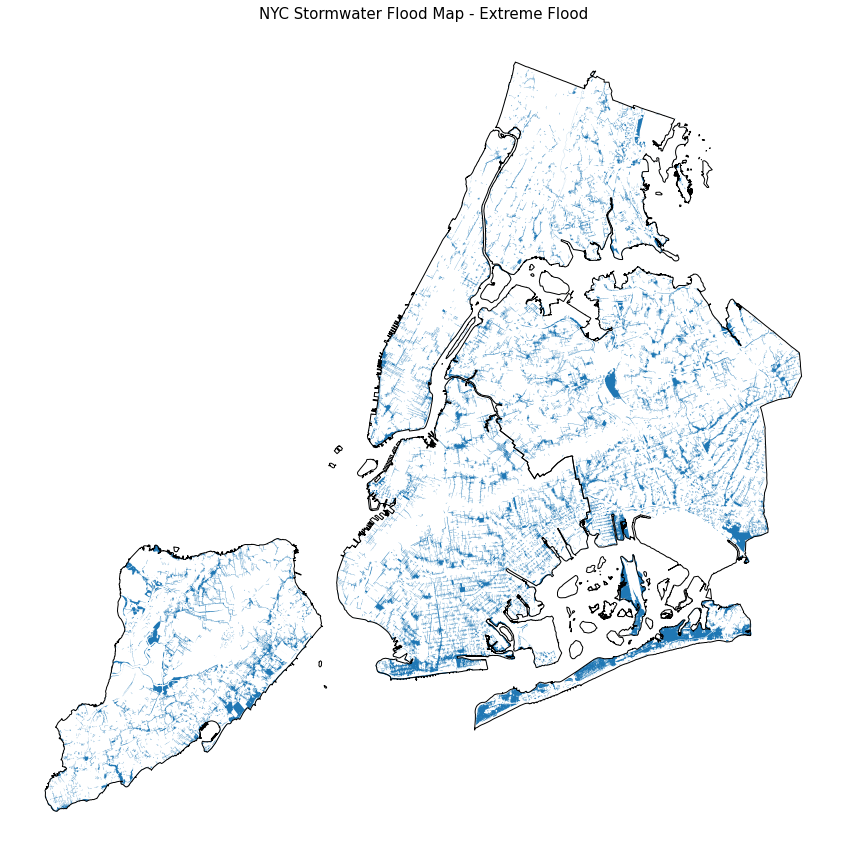

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))

gdf.plot(ax=ax)

borough_gdf.plot(ax=ax, 
                 facecolor='none', 
                 edgecolor='black', 
                 zorder=1)

plt.title('NYC Stormwater Flood Map - Extreme Flood', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/stormwater-map.png', dpi=200)

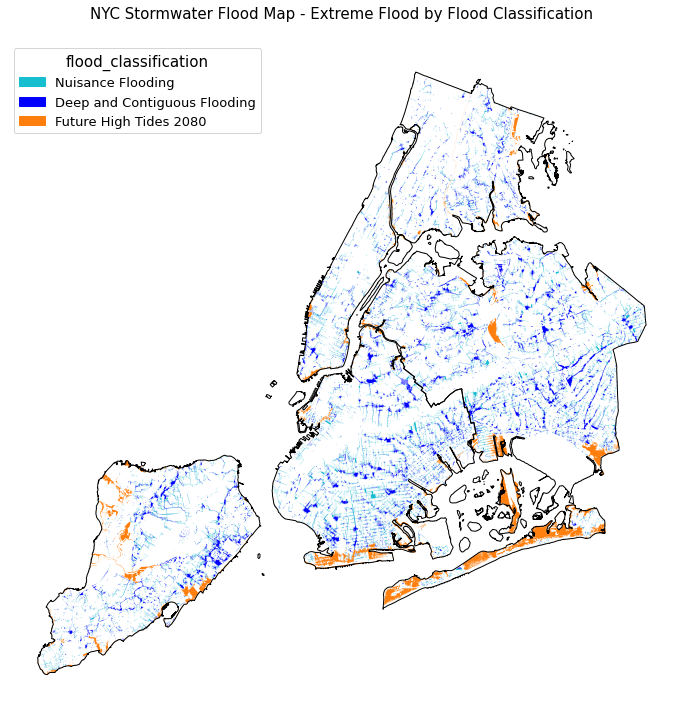

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
patches = []

for val, color in zip(gdf['flood_classification'].unique(), ['tab:cyan', 'blue', 'tab:orange']):
    gdf.loc[gdf['flood_classification'].isin([val])].plot(color=color,
                                                          ax=ax)
    patches.append(mpatches.Patch(color=color, 
                                  label=val))
borough_gdf.plot(ax=ax, 
                 facecolor='none', 
                 edgecolor='black', 
                 zorder=1)

plt.legend(title='flood_classification', 
           handles=patches, 
           fontsize='13', 
           title_fontsize='15',
           loc=2) 

plt.title('NYC Stormwater Flood Map - Extreme Flood by Flood Classification\n', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/stormwater-class-map.png', dpi=200)

manhattan is done.
bronx is done.
brooklyn is done.
staten-island is done.
queens is done.


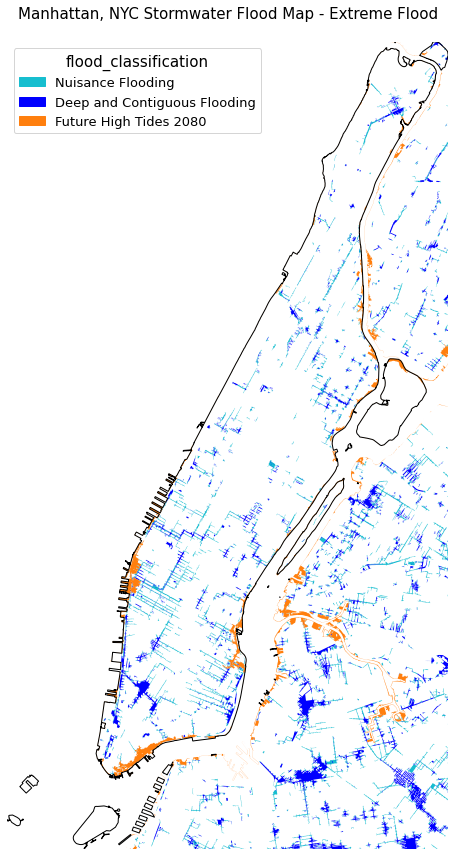

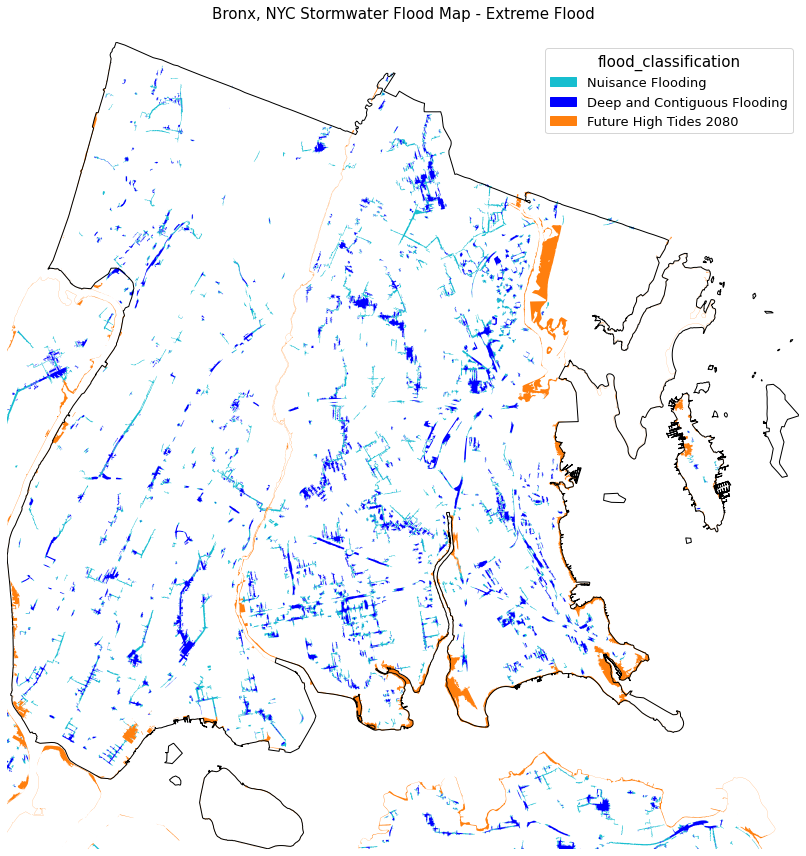

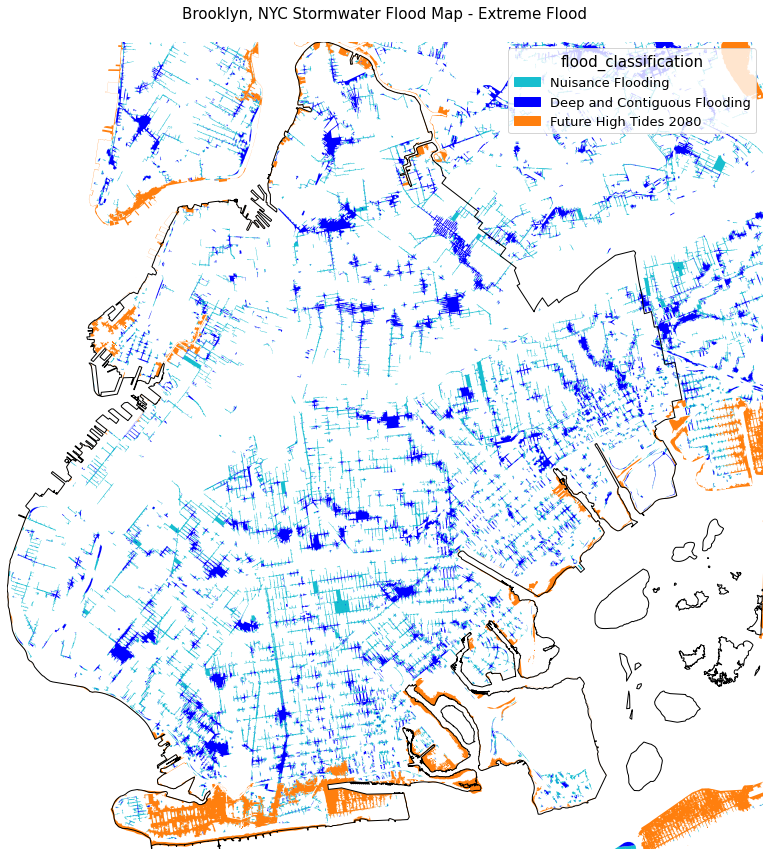

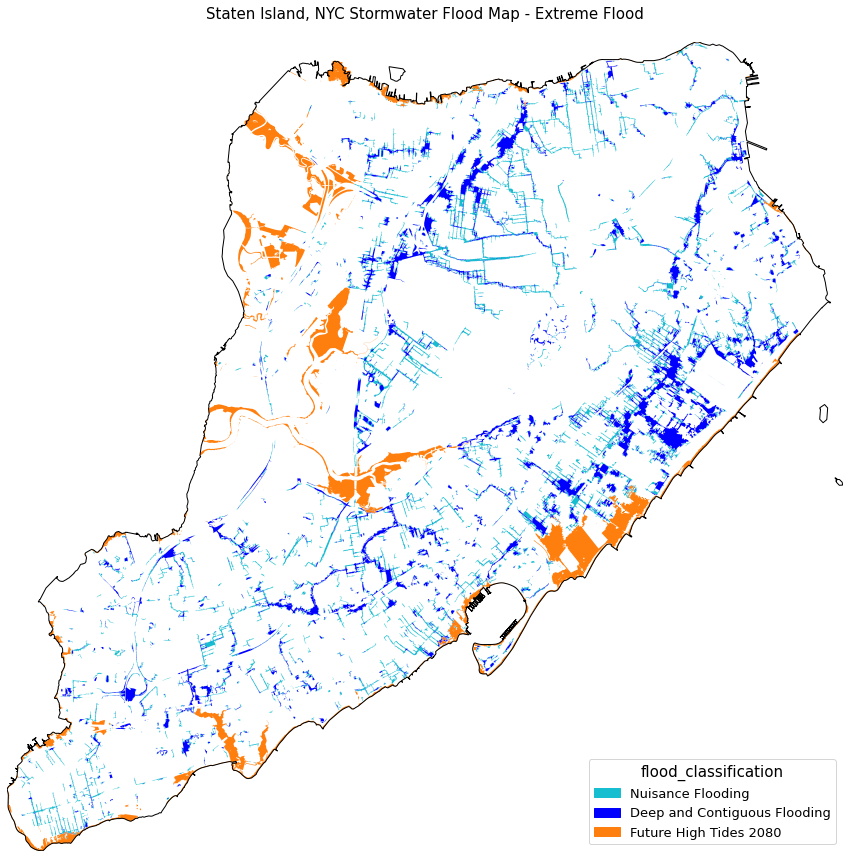

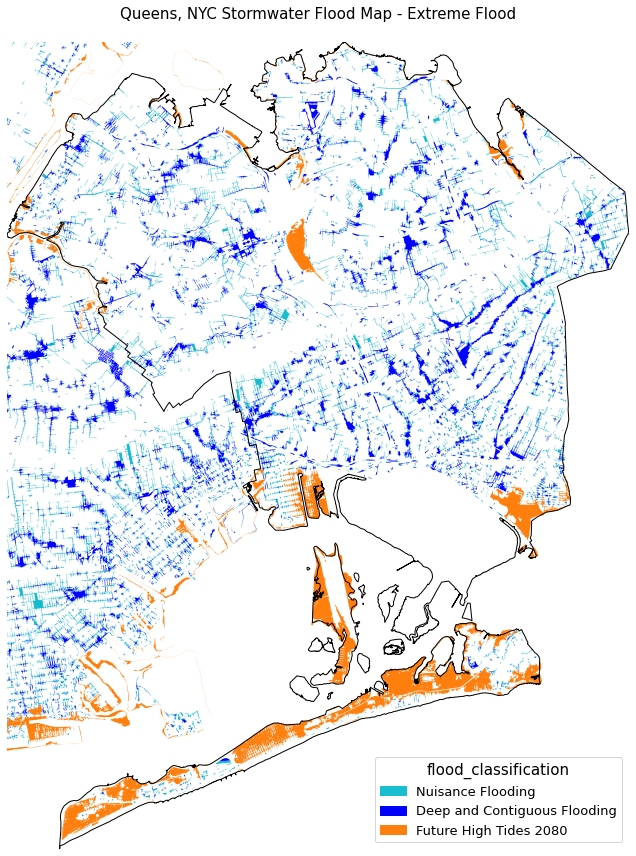

In [35]:
flood_classes = gdf['flood_classification'].unique()
colors = ['tab:cyan', 'blue', 'tab:orange']
boros = borough_gdf['boro_name'].to_list()

for boro in boros: 
    fig, ax = plt.subplots(figsize=(12, 12))
    patches = []
    
    for flood_class, color in zip(flood_classes, colors):
        gdf.loc[gdf['flood_classification'].isin([flood_class])].plot(color=color, ax=ax)
        patches.append(mpatches.Patch(color=color, label=flood_class)) 

    bounds_gdf = borough_gdf.loc[borough_gdf['boro_name'] == boro] 
    bounds_gdf.plot(ax=ax, facecolor='none', edgecolor='black', zorder=1)

    bounds = bounds_gdf.total_bounds
    xmin, xmax = bounds[0], bounds[2]
    ymin, ymax = bounds[1], bounds[3]
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    
    if boro == 'Manhattan':
        loc = 2
    elif boro == 'Staten Island':
        loc = 4
    elif boro == 'Queens':
        loc = 4
    else:
        loc = 'best'
        
    plt.legend(title='flood_classification', 
               handles=patches, 
               fontsize='13', 
               title_fontsize='15', 
               loc=loc)
    
    boro_lowercase = boro.lower()
    boro_lowercase = boro_lowercase.replace(" ", "-")
    print(boro_lowercase, 'is done.')
    
    plt.axis('off')
    plt.title('{}, NYC Stormwater Flood Map - Extreme Flood\n'.format(boro), fontsize=15)    
    plt.tight_layout()
    plt.savefig('figures/{}-stormwater-map.png'.format(boro_lowercase), dpi=200)

In [36]:
gdf.head()

Flooding_Category  Shape_Length  Shape_Area flood_classification  \
0                  1     11.396709    1.521997    Nuisance Flooding   
1                  1     38.406428   82.627967    Nuisance Flooding   
2                  1     24.389695   14.028213    Nuisance Flooding   
3                  1    198.696536  820.105280    Nuisance Flooding   
4                  1     50.837975  152.514946    Nuisance Flooding   

                                            geometry  
0  POLYGON Z ((917251.502 120925.181 0.000, 91725...  
1  POLYGON Z ((917309.366 120944.469 0.000, 91729...  
2  POLYGON Z ((917311.973 120963.757 0.000, 91730...  
3  POLYGON Z ((917248.402 120964.877 0.000, 91725...  
4  POLYGON Z ((917168.151 120963.757 0.000, 91715...

In [37]:
area_max = gdf.sort_values(by='Shape_Area', ascending=False).drop_duplicates(subset=['flood_classification'])

area_max = area_max.reset_index()
area_max.head()

index  Flooding_Category   Shape_Length    Shape_Area  \
0  162813                  3  723376.852679  5.549524e+07   
1  144781                  2   56195.167730  3.309952e+06   
2   35520                  1   72891.569453  2.549261e+06   

           flood_classification  \
0        Future High Tides 2080   
1  Deep and Contiguous Flooding   
2             Nuisance Flooding   

                                            geometry  
0  POLYGON Z ((1044751.599 158517.490 0.000, 1044...  
1  POLYGON Z ((1022076.102 209528.779 0.000, 1022...  
2  POLYGON Z ((998590.263 165794.573 0.000, 99860...

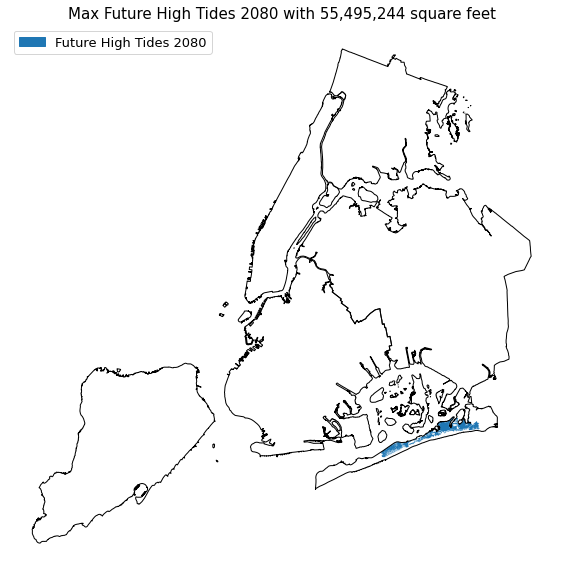

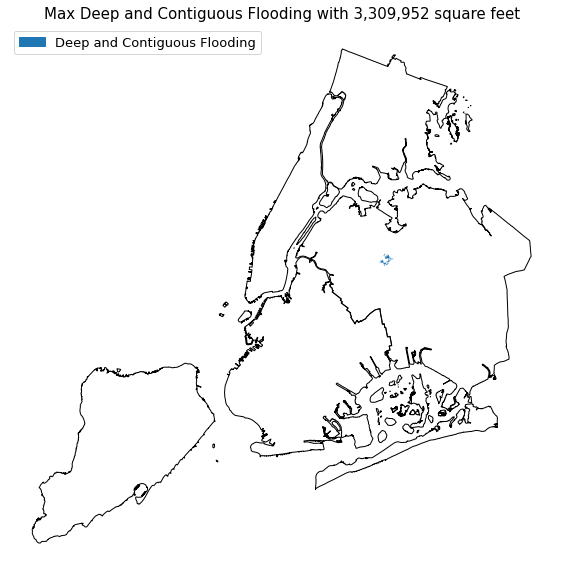

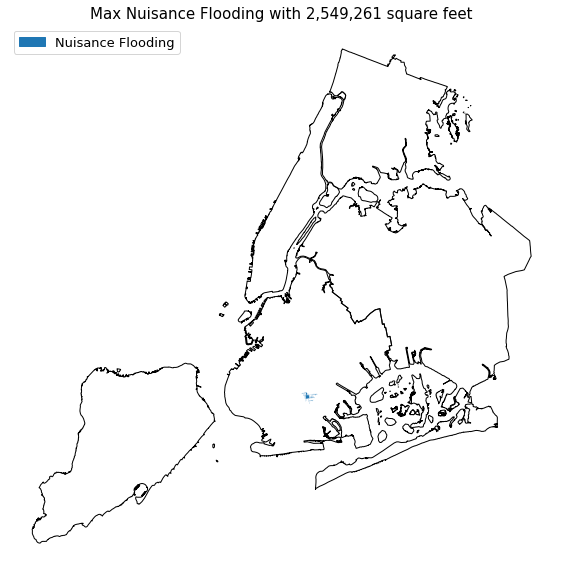

In [38]:
classes = area_max['flood_classification'].to_list()

for geom in classes:
    fig, ax = plt.subplots(figsize=(10, 10))
    patches = []
    
    plot = area_max.loc[area_max['flood_classification'] == geom]
    plot.plot(ax=ax)
    patches.append(mpatches.Patch(color='C0', label=geom)) 
    
    borough_gdf.plot(ax=ax, 
                     facecolor='none', 
                     edgecolor='black', 
                     zorder=1)
    
    plt.legend(loc=2,
               handles=patches, 
               fontsize='13')
    
    plt.axis('off')
    plt.title('Max {} with {:,.0f} square feet'.format(geom, plot['Shape_Area'].values[0]), fontsize=15)

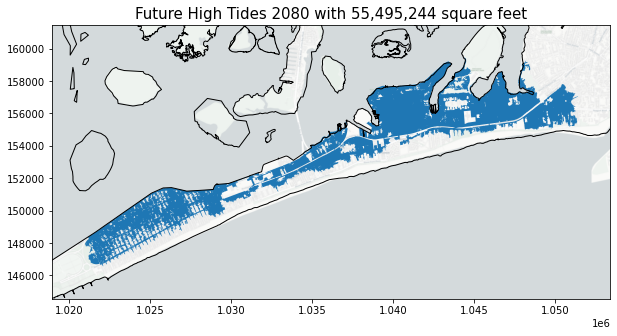

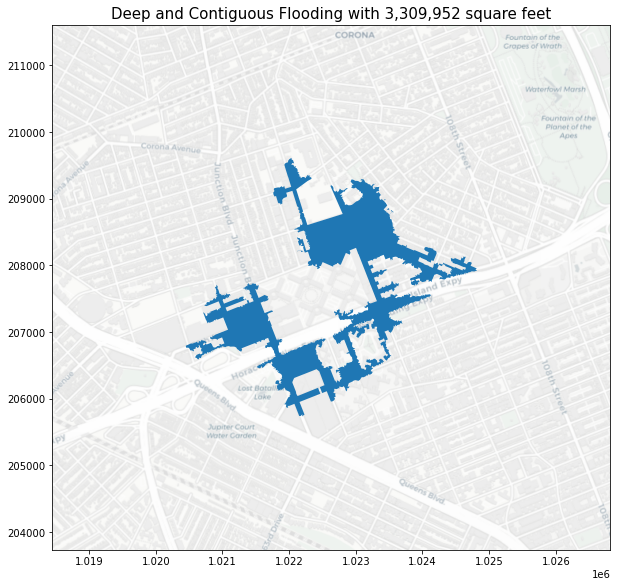

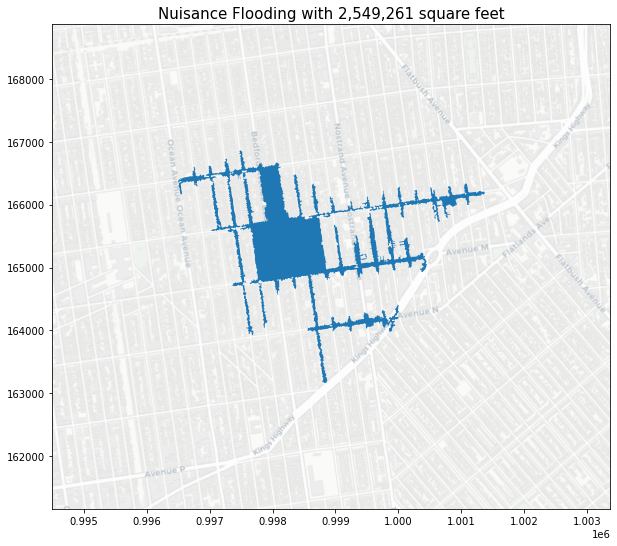

In [39]:
classes = area_max['flood_classification'].to_list()
basemap = 'https://{s}.basemaps.cartocdn.com/rastertiles/light_all/{z}/{x}/{y}.png'

for geom in classes:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    plot = area_max.loc[area_max['flood_classification'] == geom]
    plot.plot(ax=ax)
    
    borough_gdf.plot(ax=ax, 
                     facecolor='none', 
                     edgecolor='black', 
                     zorder=1)
    
    bounds = plot.total_bounds
    xmin, xmax = bounds[0], bounds[2]
    ymin, ymax = bounds[1], bounds[3]
    plt.xlim([xmin - 2000, xmax + 2000])
    plt.ylim([ymin - 2000, ymax + 2000])
    
    # adding basemap
    ctx.add_basemap(ax, 
                    crs=2263, zoom=15,
                    source=basemap)
    
    plt.title('{} with {:,.0f} square feet'.format(geom, plot['Shape_Area'].values[0]), fontsize=15)

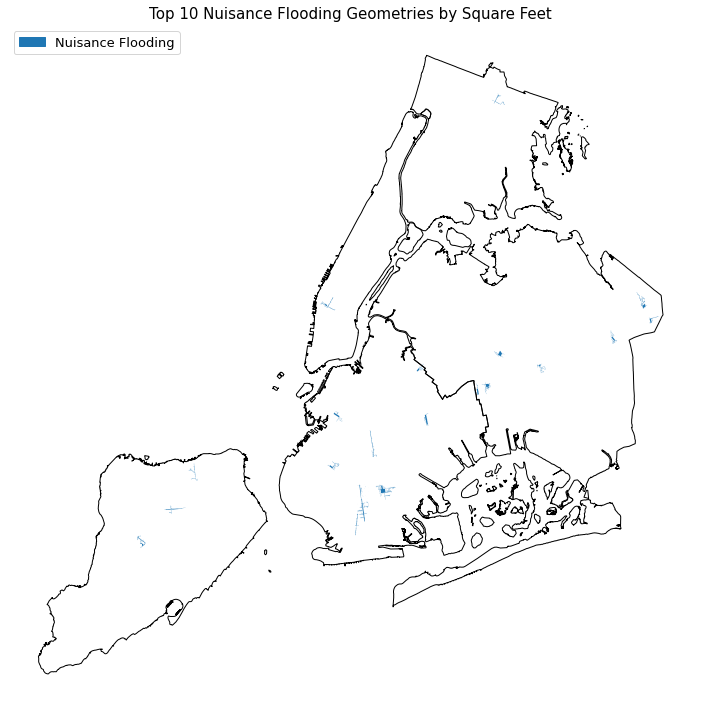

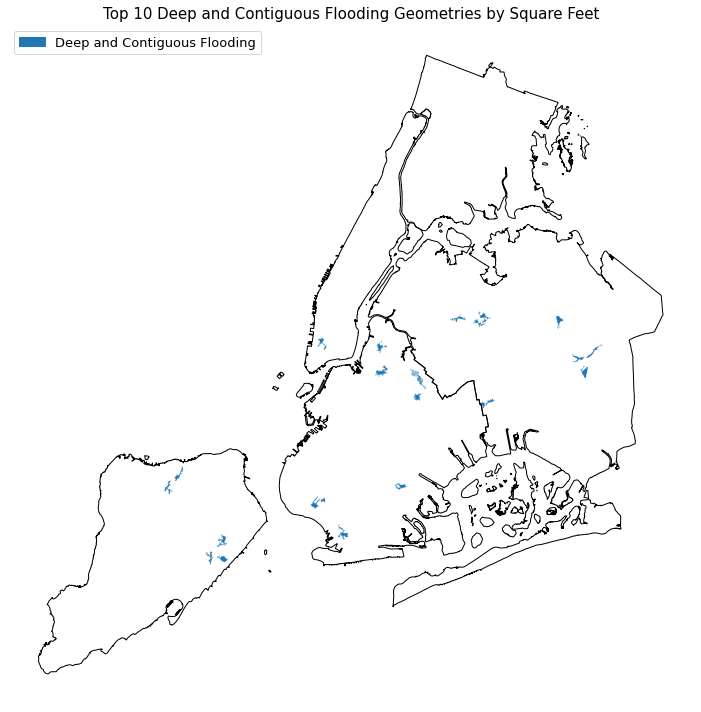

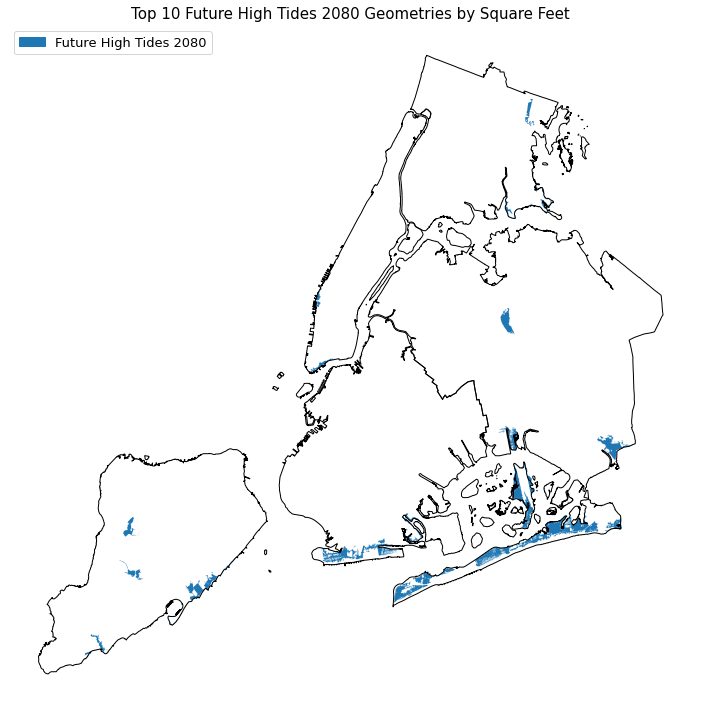

In [40]:
classes = gdf['flood_classification'].unique()

for geom in classes:
    fig, ax = plt.subplots(figsize=(10, 10))
    patches = []
    
    plot = gdf.loc[gdf['flood_classification'] == geom]
    plot = plot.sort_values(by='Shape_Area', ascending=False).head(20)
    plot.plot(ax=ax)
    patches.append(mpatches.Patch(color='C0', label=geom)) 
    
    borough_gdf.plot(ax=ax, 
                     facecolor='none', 
                     edgecolor='black', 
                     zorder=1)
    
    plt.axis('off')
    plt.title('Top 10 {} Geometries by Square Feet'.format(geom), fontsize=15)
    plt.legend(loc=2,
               handles=patches, 
               fontsize='13')
    
    plt.tight_layout()

In [41]:
deep_flooding = gdf.loc[gdf['flood_classification'] == 'Deep and Contiguous Flooding'].reset_index(drop=True)

deep_flooding.head()

Flooding_Category  Shape_Length  Shape_Area          flood_classification  \
0                  2     25.717140   41.335706  Deep and Contiguous Flooding   
1                  2     25.717796   41.337815  Deep and Contiguous Flooding   
2                  2     25.716484   41.333597  Deep and Contiguous Flooding   
3                  2     51.435593  165.351262  Deep and Contiguous Flooding   
4                  2      3.003776    0.240576  Deep and Contiguous Flooding   

                                            geometry  
0  POLYGON Z ((917270.790 120873.747 0.000, 91726...  
1  POLYGON Z ((917161.491 120912.323 0.000, 91716...  
2  POLYGON Z ((917161.491 120912.323 0.000, 91715...  
3  POLYGON Z ((917206.497 120931.611 0.000, 91720...  
4  POLYGON Z ((917084.339 120950.899 0.000, 91708...

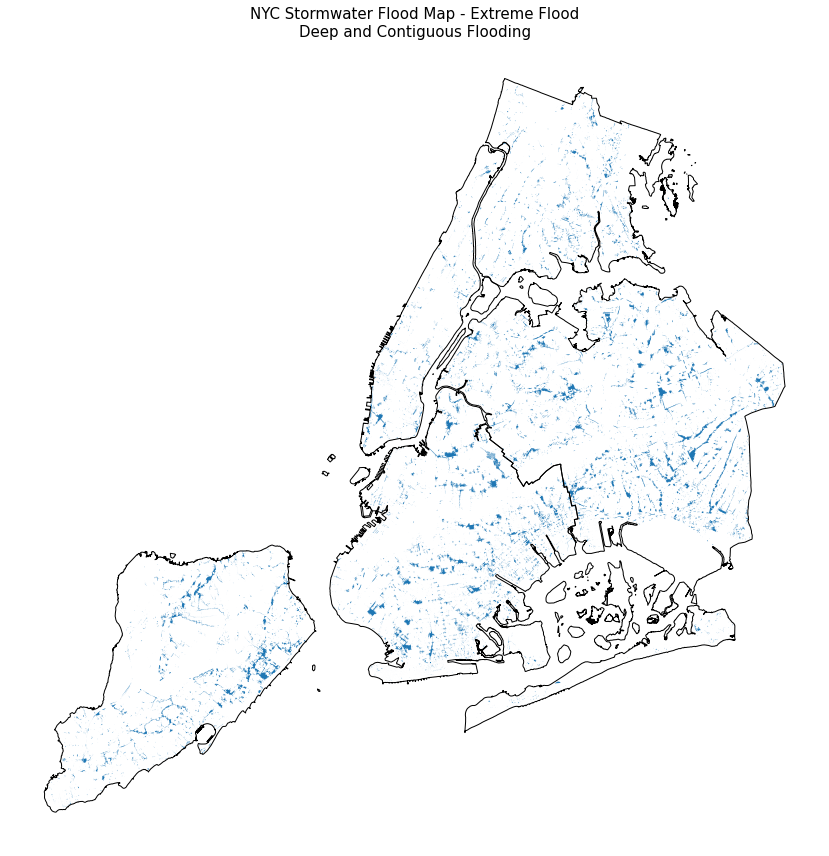

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))

deep_flooding.plot(ax=ax)

borough_gdf.plot(ax=ax, 
                 facecolor='none', 
                 edgecolor='black', 
                 zorder=1)

plt.title('NYC Stormwater Flood Map - Extreme Flood\nDeep and Contiguous Flooding', fontsize=15)
plt.axis('off')
plt.tight_layout()

In [43]:
deep_flooding.head()

Flooding_Category  Shape_Length  Shape_Area          flood_classification  \
0                  2     25.717140   41.335706  Deep and Contiguous Flooding   
1                  2     25.717796   41.337815  Deep and Contiguous Flooding   
2                  2     25.716484   41.333597  Deep and Contiguous Flooding   
3                  2     51.435593  165.351262  Deep and Contiguous Flooding   
4                  2      3.003776    0.240576  Deep and Contiguous Flooding   

                                            geometry  
0  POLYGON Z ((917270.790 120873.747 0.000, 91726...  
1  POLYGON Z ((917161.491 120912.323 0.000, 91716...  
2  POLYGON Z ((917161.491 120912.323 0.000, 91715...  
3  POLYGON Z ((917206.497 120931.611 0.000, 91720...  
4  POLYGON Z ((917084.339 120950.899 0.000, 91708...

In [44]:
join_df = gpd.sjoin(deep_flooding, 
                    borough_gdf, 
                    how="left")

join_df.head()

Flooding_Category  Shape_Length  Shape_Area          flood_classification  \
0                  2     25.717140   41.335706  Deep and Contiguous Flooding   
1                  2     25.717796   41.337815  Deep and Contiguous Flooding   
2                  2     25.716484   41.333597  Deep and Contiguous Flooding   
3                  2     51.435593  165.351262  Deep and Contiguous Flooding   
4                  2      3.003776    0.240576  Deep and Contiguous Flooding   

                                            geometry  index_right  boro_code  \
0  POLYGON Z ((917270.790 120873.747 0.000, 91726...          3.0        5.0   
1  POLYGON Z ((917161.491 120912.323 0.000, 91716...          3.0        5.0   
2  POLYGON Z ((917161.491 120912.323 0.000, 91715...          3.0        5.0   
3  POLYGON Z ((917206.497 120931.611 0.000, 91720...          3.0        5.0   
4  POLYGON Z ((917084.339 120950.899 0.000, 91708...          3.0        5.0   

       boro_name    shape_area     shape_leng  
0  Staten Island  1.623631e+09  325924.002252  
1  Staten Island  1.623631e+09  325924.002252  
2  Staten Island  1.623631e+09  325924.002252  
3  Staten Island  1.623631e+09  325924.002252  
4  Staten Island  1.623631e+09  325924.002252

In [45]:
print('dataframe shape:\n')

rows, columns = join_df.shape
print('number of rows: {:,}.\nnumber of columns: {}.'.format(rows, columns))

dataframe shape:

number of rows: 53,073.
number of columns: 10.


manhattan is done.
bronx is done.
brooklyn is done.
staten-island is done.
queens is done.


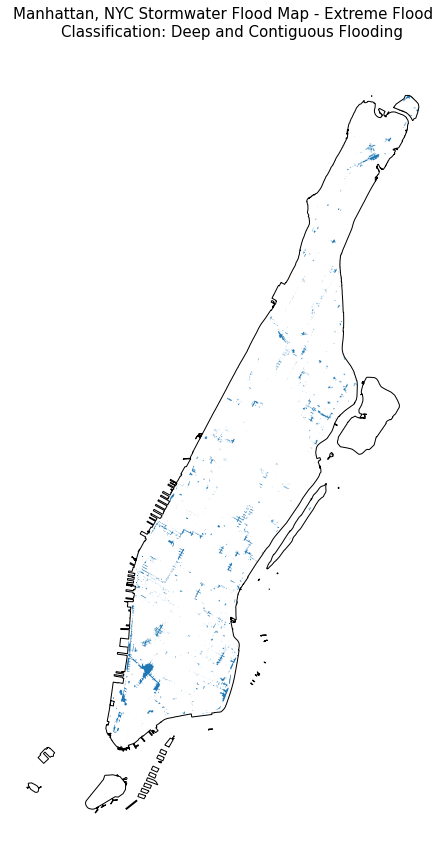

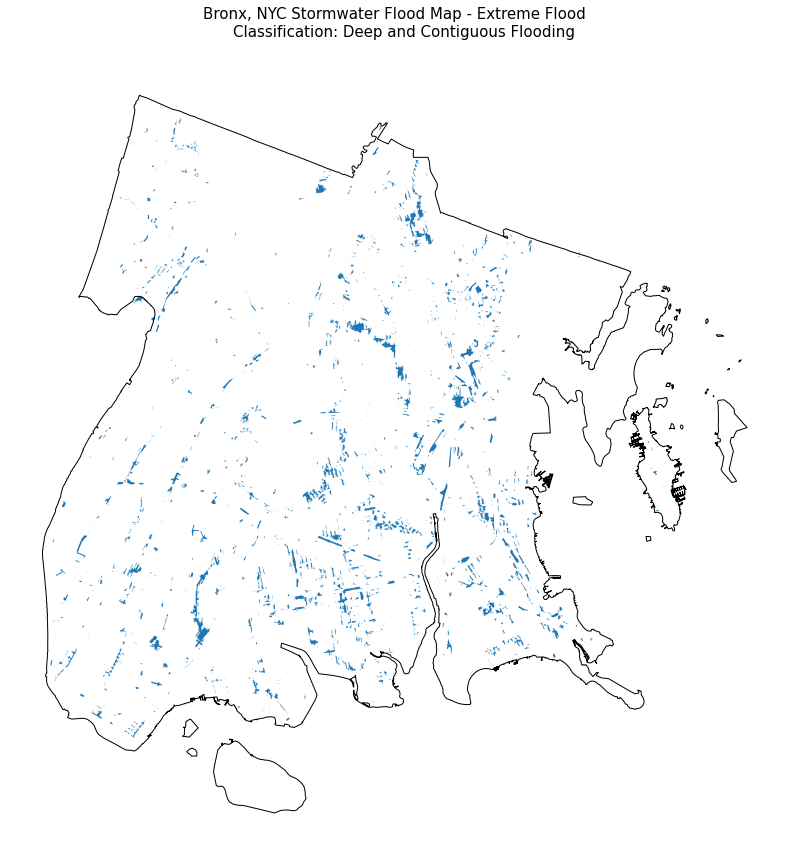

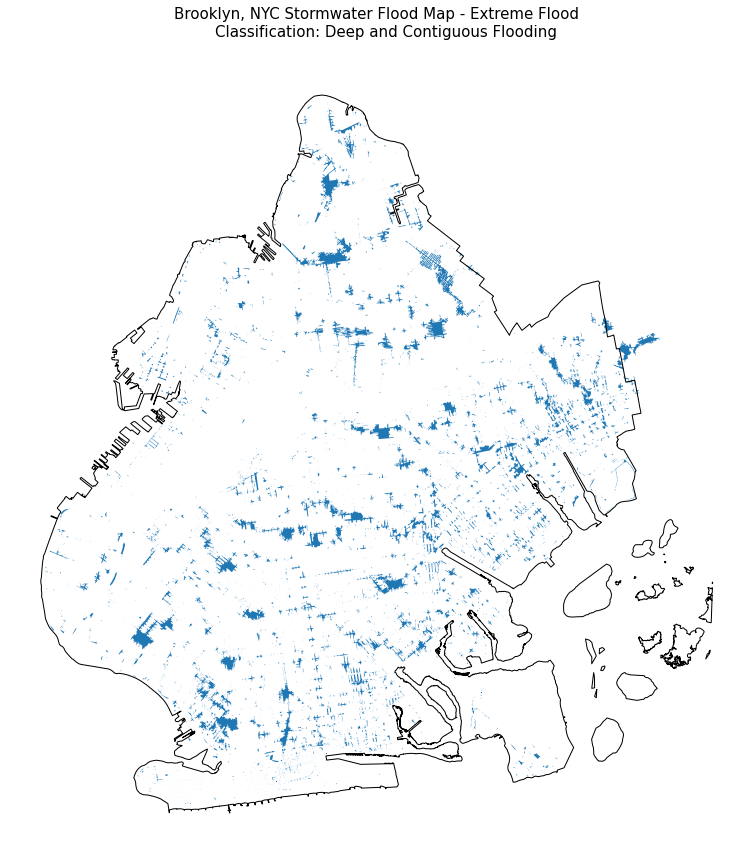

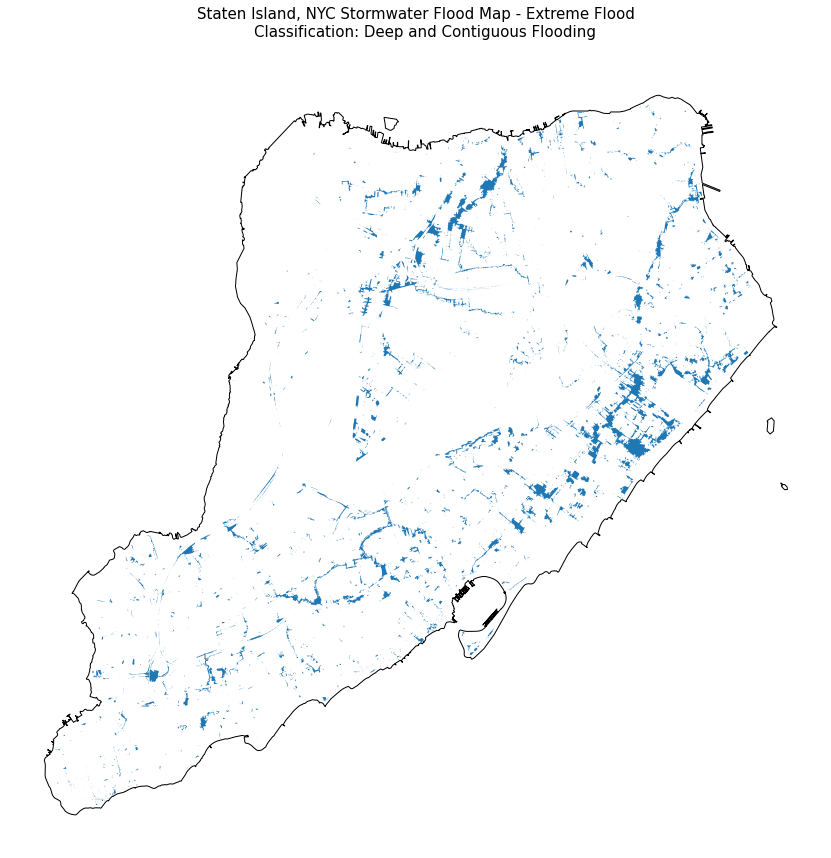

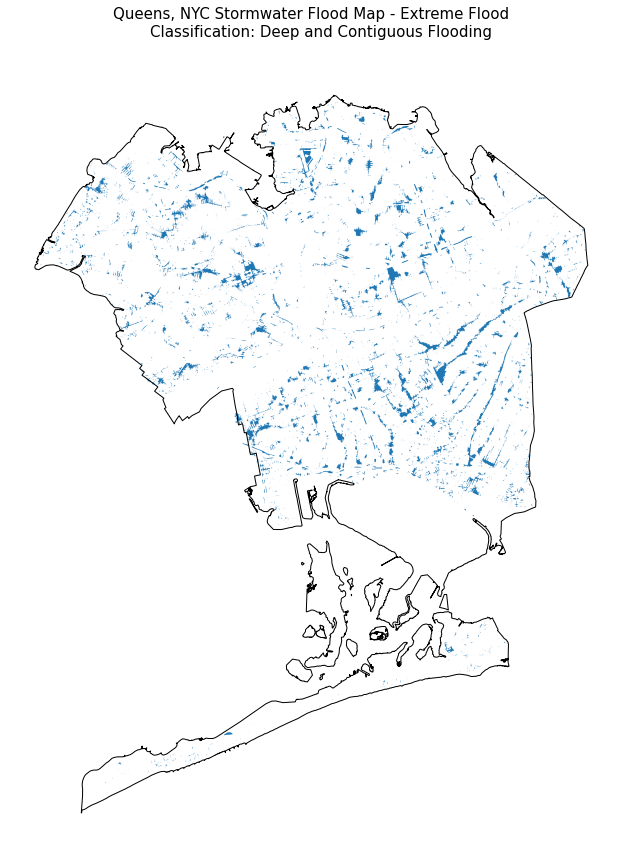

In [46]:
boros = borough_gdf['boro_name'].to_list()

for boro in boros: 
    fig, ax = plt.subplots(figsize=(12, 12))
    
    join_df.loc[join_df['boro_name'].isin([boro])].plot(ax=ax)

    bounds_gdf = borough_gdf.loc[borough_gdf['boro_name'] == boro] 
    bounds_gdf.plot(ax=ax, facecolor='none', edgecolor='black', zorder=1)
    
    boro_lowercase = boro.lower()
    boro_lowercase = boro_lowercase.replace(" ", "-")
    print(boro_lowercase, 'is done.')

    plt.axis('off')
    plt.title('{}, NYC Stormwater Flood Map - Extreme Flood\n\
    Classification: Deep and Contiguous Flooding\n'.format(boro), fontsize=15)   
    plt.tight_layout()
    plt.savefig('figures/{}-deep-flood-stormwater-map.png'.format(boro_lowercase), dpi=200)

In [47]:
boro_area = join_df.groupby(by='boro_name')['Shape_Area'].sum().reset_index()
boro_area = boro_area.merge(borough_gdf[['boro_name', 'shape_area']])
boro_area = boro_area.rename(columns={'shape_area':'boro_area'})

boro_area.head()

boro_name    Shape_Area     boro_area
0          Bronx  3.300532e+07  1.187194e+09
1       Brooklyn  1.051031e+08  1.934174e+09
2      Manhattan  1.639207e+07  6.366208e+08
3         Queens  1.486244e+08  3.040206e+09
4  Staten Island  6.728379e+07  1.623631e+09

In [48]:
boro_area['area_normalized'] = boro_area['Shape_Area'] / boro_area['boro_area']

boro_area.head()

boro_name    Shape_Area     boro_area  area_normalized
0          Bronx  3.300532e+07  1.187194e+09         0.027801
1       Brooklyn  1.051031e+08  1.934174e+09         0.054340
2      Manhattan  1.639207e+07  6.366208e+08         0.025749
3         Queens  1.486244e+08  3.040206e+09         0.048886
4  Staten Island  6.728379e+07  1.623631e+09         0.041440

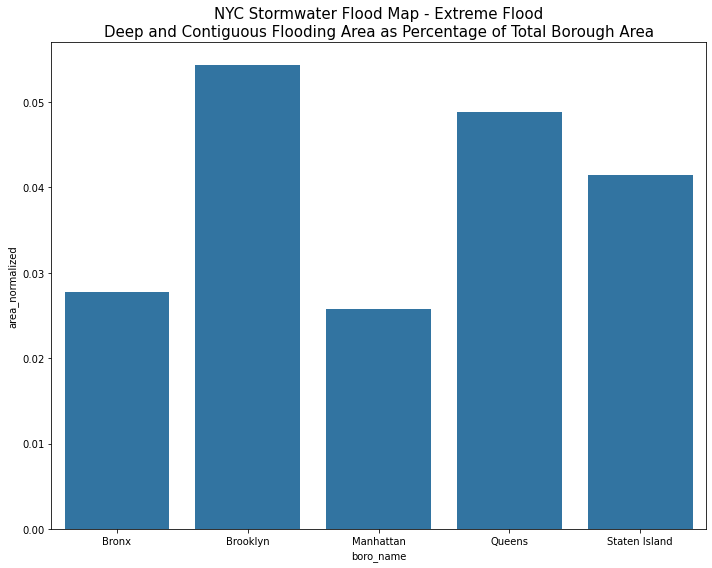

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=boro_area, 
            x='boro_name', 
            y='area_normalized', 
            color='C0',
            ax=ax)

plt.title('NYC Stormwater Flood Map - Extreme Flood\n\
Deep and Contiguous Flooding Area as Percentage of Total Borough Area', fontsize=15)
plt.tight_layout()
plt.savefig('figures/deep-flooding-stormwater-bar.png', dpi=200)

In [50]:
high_tides = gdf.loc[gdf['flood_classification'] == 'Future High Tides 2080'].reset_index(drop=True)

join_df = gpd.sjoin(high_tides, 
                    borough_gdf, 
                    how="left")

print('dataframe shape:\n')

rows, columns = join_df.shape
print('number of rows: {:,}.\nnumber of columns: {}.'.format(rows, columns))

join_df.head()

dataframe shape:

number of rows: 14,706.
number of columns: 10.


Flooding_Category  Shape_Length  Shape_Area    flood_classification  \
0                  3     25.717796   41.337816  Future High Tides 2080   
1                  3     25.717140   41.335706  Future High Tides 2080   
2                  3     51.434936  124.011337  Future High Tides 2080   
3                  3    115.728115  330.694087  Future High Tides 2080   
4                  3    154.304153  868.066704  Future High Tides 2080   

                                            geometry  index_right  boro_code  \
0  POLYGON Z ((915290.556 120269.389 0.000, 91528...          3.0        5.0   
1  POLYGON Z ((915284.126 120275.819 0.000, 91527...          3.0        5.0   
2  POLYGON Z ((915341.990 120275.819 0.000, 91533...          3.0        5.0   
3  POLYGON Z ((915296.985 120295.107 0.000, 91527...          3.0        5.0   
4  POLYGON Z ((915329.132 120282.248 0.000, 91531...          3.0        5.0   

       boro_name    shape_area     shape_leng  
0  Staten Island  1.623631e+09  325924.002252  
1  Staten Island  1.623631e+09  325924.002252  
2  Staten Island  1.623631e+09  325924.002252  
3  Staten Island  1.623631e+09  325924.002252  
4  Staten Island  1.623631e+09  325924.002252

manhattan is done.
bronx is done.
brooklyn is done.
staten-island is done.
queens is done.


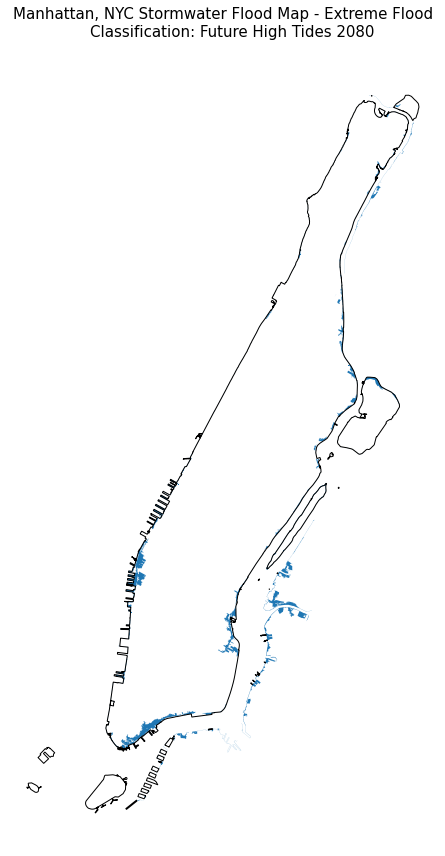

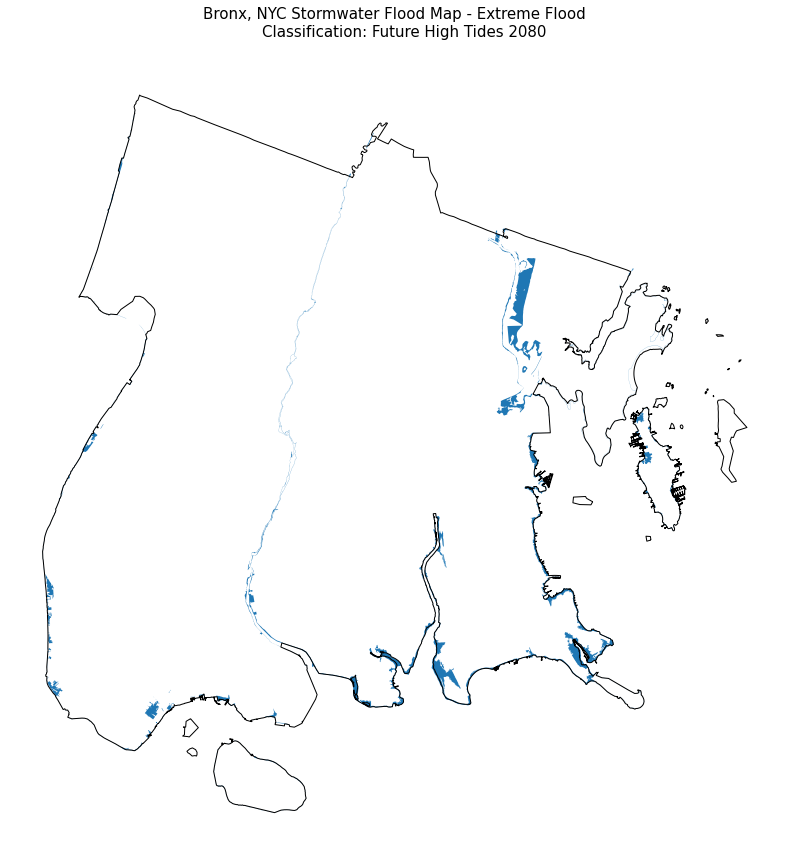

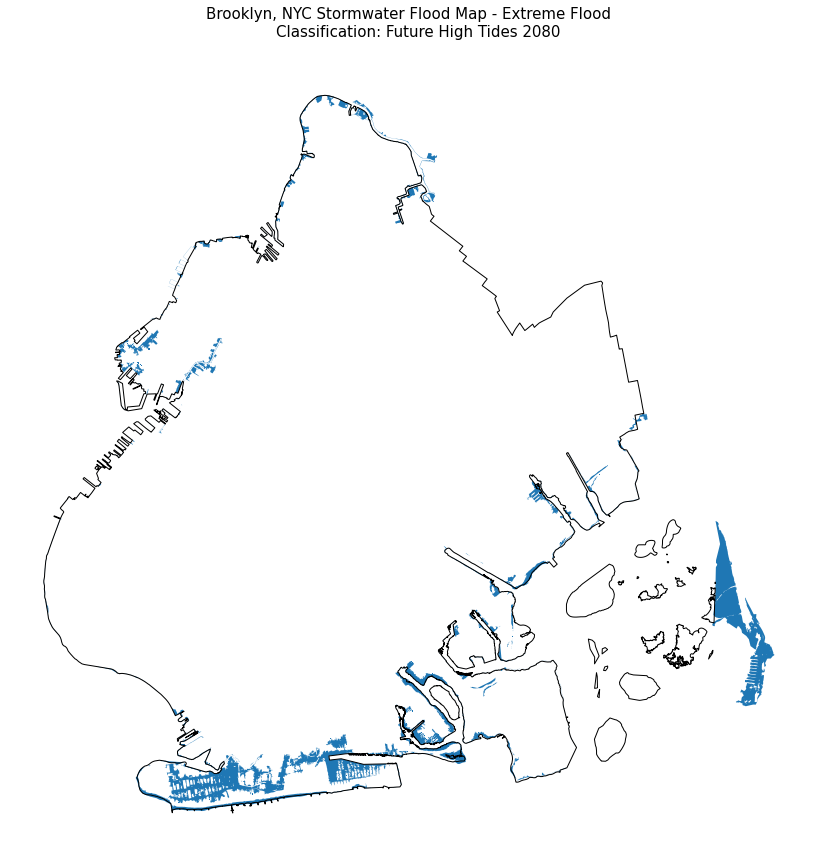

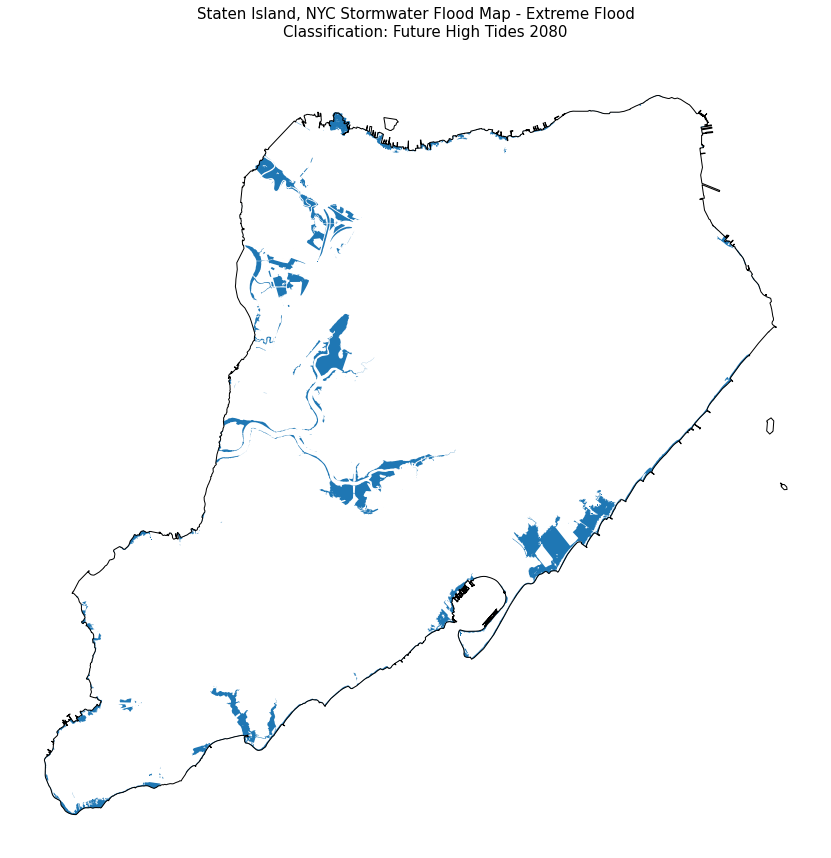

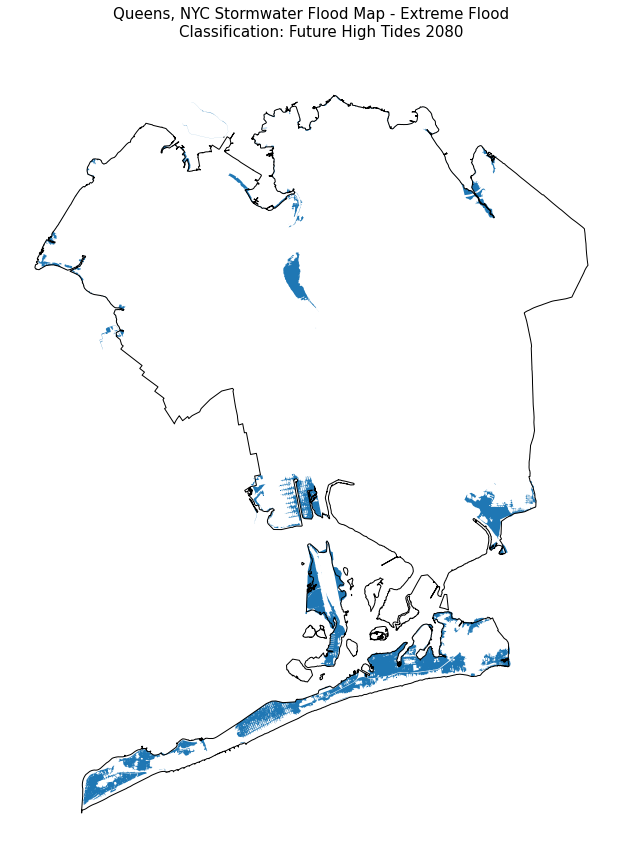

In [51]:
boros = borough_gdf['boro_name'].to_list()

for boro in boros: 
    fig, ax = plt.subplots(figsize=(12, 12))
    
    join_df.loc[join_df['boro_name'].isin([boro])].plot(ax=ax)

    bounds_gdf = borough_gdf.loc[borough_gdf['boro_name'] == boro] 
    bounds_gdf.plot(ax=ax, facecolor='none', edgecolor='black', zorder=1)
    
    boro_lowercase = boro.lower()
    boro_lowercase = boro_lowercase.replace(" ", "-")
    print(boro_lowercase, 'is done.')

    plt.axis('off')
    plt.title('{}, NYC Stormwater Flood Map - Extreme Flood\n\
    Classification: Future High Tides 2080\n'.format(boro), fontsize=15)   
    plt.tight_layout()
    plt.savefig('figures/{}-high-tides-stormwater-map.png'.format(boro_lowercase), dpi=200)

In [52]:
boro_area = join_df.groupby(by='boro_name')['Shape_Area'].sum().reset_index()
boro_area = boro_area.merge(borough_gdf[['boro_name', 'shape_area']])
boro_area = boro_area.rename(columns={'shape_area':'boro_area'})

boro_area['area_normalized'] = boro_area['Shape_Area'] / boro_area['boro_area']
boro_area.head()

boro_name    Shape_Area     boro_area  area_normalized
0          Bronx  2.468693e+07  1.187194e+09         0.020794
1       Brooklyn  8.713106e+07  1.934174e+09         0.045048
2      Manhattan  2.458397e+07  6.366208e+08         0.038616
3         Queens  1.795809e+08  3.040206e+09         0.059069
4  Staten Island  6.589545e+07  1.623631e+09         0.040585

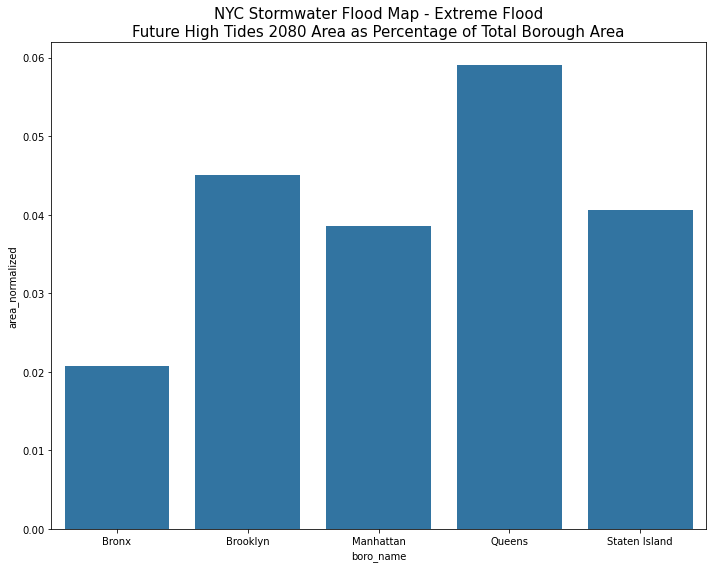

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=boro_area, 
            x='boro_name', 
            y='area_normalized', 
            color='C0',
            ax=ax)

plt.title('NYC Stormwater Flood Map - Extreme Flood\n\
Future High Tides 2080 Area as Percentage of Total Borough Area', fontsize=15)
plt.tight_layout()
plt.savefig('figures/high-tides-stormwater-bar.png', dpi=200)